Missing Values in each column:
 Contract_number      0
Sex                  0
Birth_year           0
Birth_month          0
End_age              0
Claim_year           0
Claim_month          0
Pct_dis1             0
Pct_dis2             0
Pct_dis3             0
Pct_dis4             0
Pct_dis5             0
Pct_dis6             0
Pct_dis7             0
Pct_dis8             0
Pct_dis9             0
Pct_dis10            0
Pct_dis11            0
Pct_dis12            0
Pct_dis13            0
Pct_dis14            0
Pct_dis15            0
Pct_dis16            0
Pct_dis17            0
Pct_dis18            0
Pct_dis19            0
Pct_dis20            0
Pct_dis21            0
Duration             0
Postalcode           0
District             0
Broker             432
Annuity              0
dtype: int64

Missing Values After Imputation:
 Contract_number    0
Sex                0
Birth_year         0
Birth_month        0
End_age            0
Claim_year         0
Claim_month        0
Pct_dis1      

<ipython-input-40-cf138aded0d3>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Broker'].fillna(df['Broker'].mode()[0], inplace=True)


Silhouette Score for k=2: 0.6575758791261389
Silhouette Score for k=3: 0.6942085681417446
Silhouette Score for k=4: 0.6690138523222285
Silhouette Score for k=5: 0.648646022425441
Silhouette Score for k=6: 0.6312506260440494
Silhouette Score for k=7: 0.6010236609478959
Silhouette Score for k=8: 0.5723850748554279
Silhouette Score for k=9: 0.5673952449929878
Silhouette Score for k=10: 0.5183834343306177


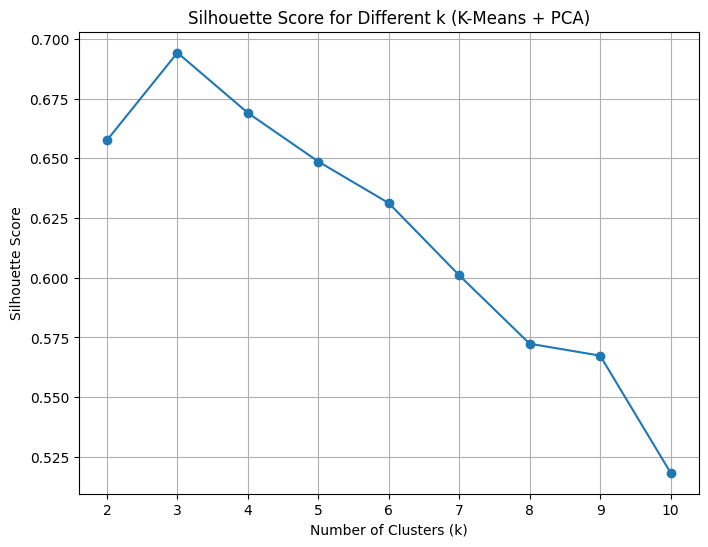

Optimal number of clusters (k) based on Silhouette Score: 3


In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("Improving_P&L_machineLearning.xlsx", sheet_name="AllianzDisabilityClaimDataset")

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in each column:\n", missing_values)

df['Broker'].fillna(df['Broker'].mode()[0], inplace=True)

# Check if there are any missing values left
missing_values_after = df.isnull().sum()
print("\nMissing Values After Imputation:\n", missing_values_after)

# Select only numeric columns for scaling and PCA
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='median')
df_numeric_imputed = imputer.fit_transform(df_numeric)


# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Apply PCA for dimensionality reduction (2 components for visualization)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Loop through different values of k and calculate Silhouette Scores
silhouette_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_pca)
    sil_score = silhouette_score(df_pca, labels)
    silhouette_scores.append(sil_score)
    print(f'Silhouette Score for k={k}: {sil_score}')

# Plot the Silhouette Scores for different k values
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different k (K-Means + PCA)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Find the optimal number of clusters
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of clusters (k) based on Silhouette Score: {best_k}')

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_pca)


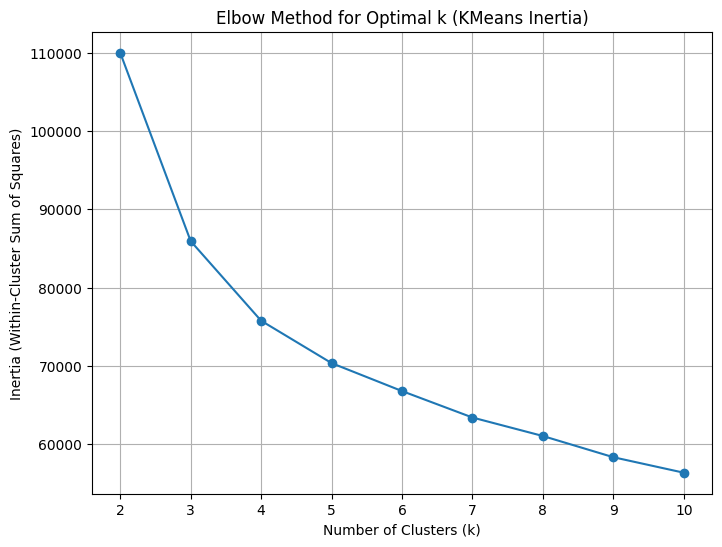

In [41]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming df_scaled is your processed (numeric, imputed, scaled) DataFrame or array

inertias = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_scaled)  # Use full feature space (not PCA) for elbow method
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method for Optimal k (KMeans Inertia)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Drop rows with any missing values
df = df.dropna()

# Remove irrelevant columns if present
cols_to_drop = ['Contract_number', 'Postalcode']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

# Optional: Apply log transformation to skewed features (example: Pct_dis1)
if 'Pct_dis1' in df.columns and (df['Pct_dis1'] >= 0).all():
    df['Pct_dis1'] = np.log1p(df['Pct_dis1'])

# Select numeric columns after dropping/transforming
numeric_cols = df.select_dtypes(include=[float, int]).columns
df_scaled = StandardScaler().fit_transform(df[numeric_cols])

# PCA for dimensionality reduction
df_pca = PCA(n_components=2).fit_transform(df_scaled)

# K-Means clustering with k=3 (can change k as needed)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(df_pca)

# Silhouette Score after feature engineering
sil_score = silhouette_score(df_pca, df['Cluster_KMeans'])
print(f'Silhouette Score after feature Enginnering (K-Means, k=3): {sil_score:.3f}')


Silhouette Score after feature Enginnering (K-Means, k=3): 0.730


# **Customer Segmentation**

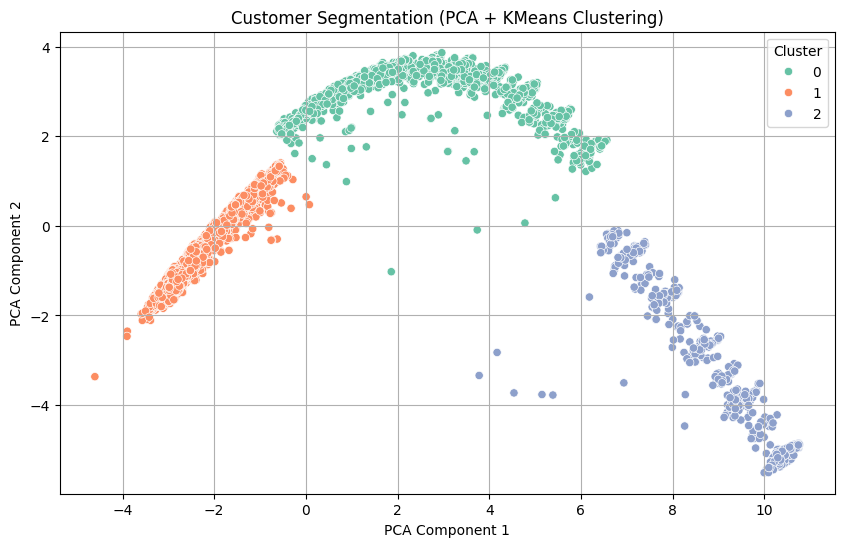

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_pca is a numpy array of shape (n_samples, 2)
# and df['Cluster_KMeans'] has your cluster labels

# Convert PCA results to a DataFrame with the same index as df
df_pca_df = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'], index=df.index)
df_plot = pd.concat([df_pca_df, df['Cluster_KMeans']], axis=1)

# Now plot using DataFrame columns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_KMeans', data=df_plot, palette='Set2')
plt.title('Customer Segmentation (PCA + KMeans Clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


**SUMMARY OF CLUSTERS**

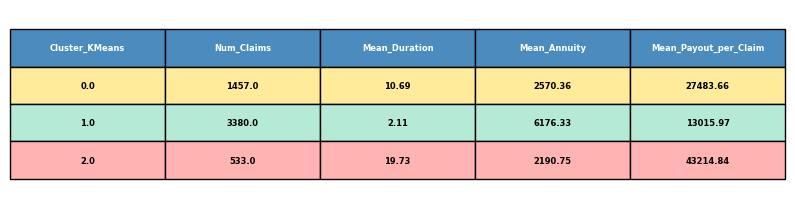

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df has columns: 'Cluster', 'Duration', 'Annuity'
# If not, make sure to update these names

# Calculate cluster summary
summary = (
    df.groupby('Cluster_KMeans')
      .agg(
          Num_Claims=('Duration', 'count'),
          Mean_Duration=('Duration', 'mean'),
          Mean_Annuity=('Annuity', 'mean')
      )
      .reset_index()
)

# Calculate Mean_Payout_per_Claim
summary['Mean_Payout_per_Claim'] = summary['Mean_Duration'] * summary['Mean_Annuity']

# Row colors for each cluster (repeat per column)
row_colors = [
    ['#FFEB99'] * len(summary.columns),   # pastel yellow
    ['#B5EAD7'] * len(summary.columns),   # pastel green
    ['#FFB3B3'] * len(summary.columns)    # pastel pink
]

fig, ax = plt.subplots(figsize=(8, 2.2))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

table = plt.table(
    cellText=np.round(summary.values, 2),
    colLabels=summary.columns,
    loc='center',
    cellLoc='center',
    rowLoc='center',
    cellColours=row_colors,
    colColours=['#4B8BBE'] * len(summary.columns)  # dark blue header
)

# Style header
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_fontsize(12)
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#4B8BBE')
    else:
        cell.set_fontsize(11)
        cell.set_text_props(weight='bold')

table.scale(1.2, 2)
plt.tight_layout()
plt.savefig('Table.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


**CLAIM DURATION DISTRIBUTION**

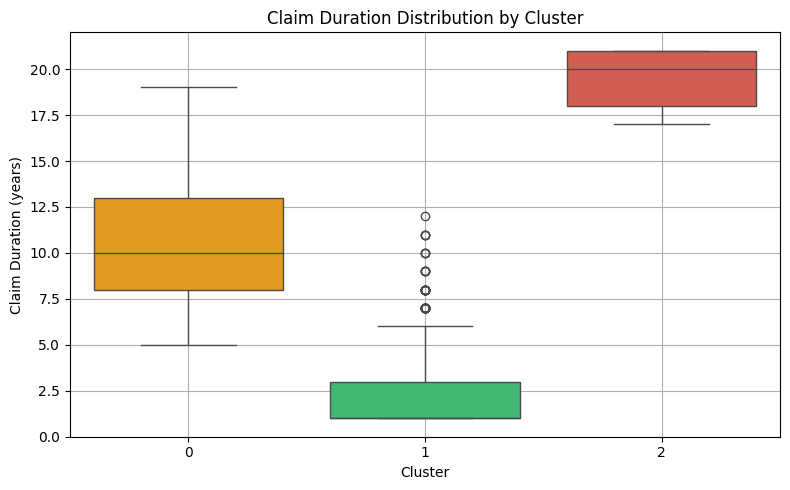

In [ ]:
# 🎨 Fix: Use hue and set legend=False to suppress legend since x=hue
# ✅ Also ensure keys in palette match dtype of Cluster (integers)

# Define custom color mapping with integer keys
custom_palette = {
    0: '#FFA500',  # Orange = medium risk
    1: '#2ECC71',  # Green = low risk
    2: '#E74C3C'   # Red = high risk
}

# 📊 Plot color-coded boxplot with Cluster as both x and hue
plt.figure(figsize=(8, 5))
# Changed 'Cluster' to 'Cluster_KMeans' to match the column name in the DataFrame
sns.boxplot(x='Cluster_KMeans', y='Duration', hue='Cluster_KMeans', data=df, palette=custom_palette, legend=False)
plt.title('Claim Duration Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Claim Duration (years)')
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig('Claim_Duration_By_Cluster_Colored.png')
plt.show()

**GENDER DISTRIBUTION BY GENDER**

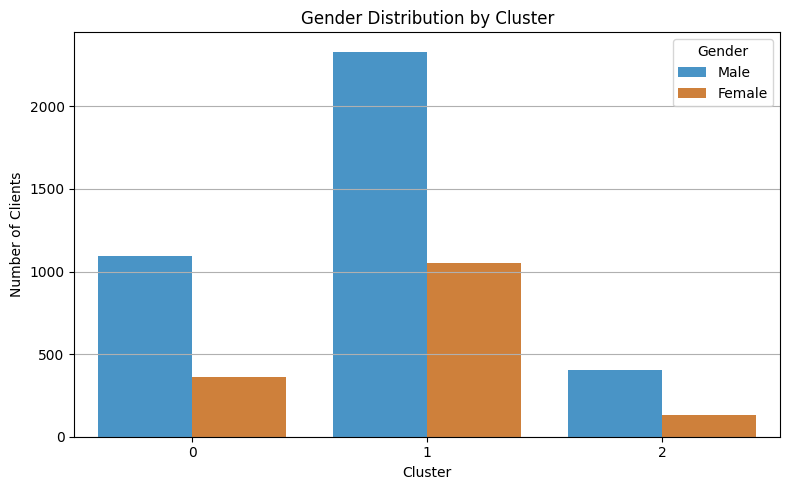

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

# Select features for clustering (adjust as needed)
feature_cols = [
    'Sex', 'Birth_year', 'Birth_month', 'End_age', 'Claim_year', 'Claim_month',
    'Pct_dis1', 'Pct_dis2', 'Pct_dis21', 'Duration', 'Annuity'
]
feature_cols += [col for col in df.columns if col.startswith('Pct_dis') and col not in feature_cols]
feature_cols = list(dict.fromkeys(feature_cols))

X = df[feature_cols].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_pca)
# Assign gender labels (run this again to be sure)
df['Gender_Label'] = df['Sex'].map({1: 'Male', 2: 'Female'})

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Cluster_KMeans', hue='Gender_Label', data=df, palette={'Male': '#3498DB', 'Female': '#E67E22'})
plt.title('Gender Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Clients')
plt.grid(True, axis='y')
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig('Gender_Distribution_By_Cluster.png')
plt.show()



# **Average Annuity Paid by Cluster**

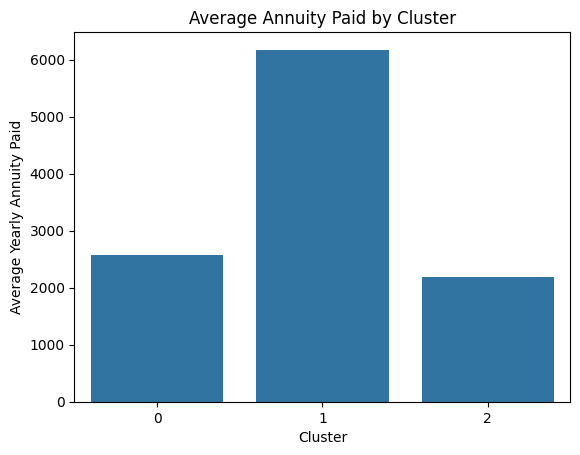

In [ ]:
cluster_annuity_avg = df.groupby('Cluster_KMeans')['Annuity'].mean().reset_index()
sns.barplot(x='Cluster_KMeans', y='Annuity', data=cluster_annuity_avg)
plt.title('Average Annuity Paid by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Yearly Annuity Paid')
plt.show()


# **Annuity vs. Duration by Cluster (with Centroids)**

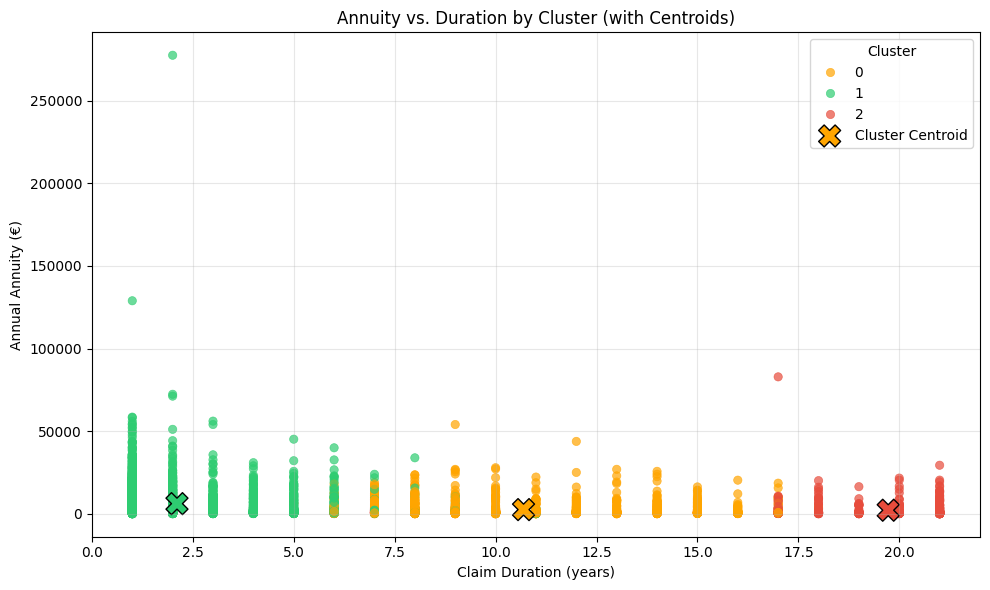

This chart shows how different client segments (clusters) have different risk profiles
Green dots (Cluster 1) are short claims and not risky for the company, even if their annuities are sometimes high
Orange and red dots (Clusters 0 & 2) are long-duration claims — they are our main concern for future losses, as total payouts can get very high


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- After clustering and assigning df['Cluster'] as before ---

# Custom color palette for business clarity
custom_palette = {0: '#FFA500', 1: '#2ECC71', 2: '#E74C3C'}  # Orange, Green, Red

# Plot the scatter plot with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Duration',
    y='Annuity',
    hue='Cluster_KMeans',
    data=df,
    palette=custom_palette,
    alpha=0.7,
    edgecolor=None
)

# Calculate centroids for each cluster
centroids = df.groupby('Cluster_KMeans')[['Duration', 'Annuity']].mean().reset_index()

# Overlay centroids as big X markers
plt.scatter(
    centroids['Duration'],
    centroids['Annuity'],
    c=[custom_palette[c] for c in centroids['Cluster_KMeans']],
    marker='X',
    s=250,
    edgecolors='black',
    label='Cluster Centroid'
)

# Plot details
plt.title('Annuity vs. Duration by Cluster (with Centroids)')
plt.xlabel('Claim Duration (years)')
plt.ylabel('Annual Annuity (€)')
plt.grid(True, alpha=0.3)
plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()
plt.savefig('Annuity_vs_Duration_by_Cluster_with_Centroids.png')
plt.show()
print("This chart shows how different client segments (clusters) have different risk profiles")
print("Green dots (Cluster 1) are short claims and not risky for the company, even if their annuities are sometimes high")
print("Orange and red dots (Clusters 0 & 2) are long-duration claims — they are our main concern for future losses, as total payouts can get very high")

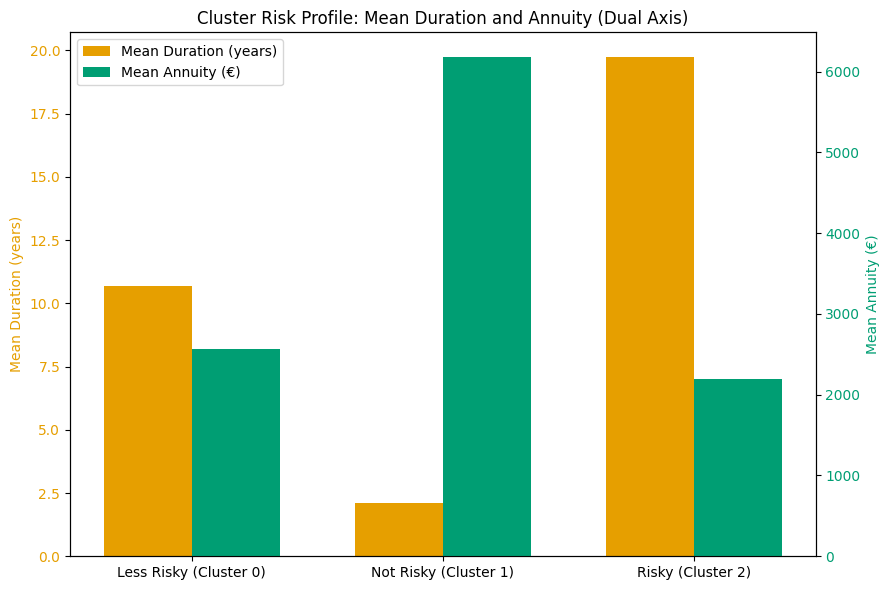

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Compute cluster summary (replace with your own DataFrame as needed)
summary = (
    df.groupby('Cluster_KMeans')
      .agg(
          Mean_Duration=('Duration', 'mean'),
          Mean_Annuity=('Annuity', 'mean')
      )
      .reset_index()
)

# Map cluster numbers to risk names (edit as needed)
risk_map = {2: "Risky", 0: "Less Risky", 1: "Not Risky"}
summary['Risk_Label'] = summary['Cluster_KMeans'].map(risk_map)

# Sort by preferred risk order (edit as needed)
risk_order = ["Less Risky", "Not Risky", "Risky"]
summary['Risk_Order'] = summary['Risk_Label'].apply(lambda x: risk_order.index(x))
summary = summary.sort_values('Risk_Order').reset_index(drop=True)

# Data for plot
durations = summary['Mean_Duration'].values
annuities = summary['Mean_Annuity'].values
clusters = summary['Cluster_KMeans'].astype(int).tolist()
risk_labels = summary['Risk_Label'].tolist()

# Build x-axis labels
x_labels = [f"{risk_labels[i]} (Cluster {clusters[i]})" for i in range(len(clusters))]
x = np.arange(len(clusters))
width = 0.35

fig, ax1 = plt.subplots(figsize=(9,6))
DURATION_COLOR = '#e69f00'  # deep gold
ANNUITY_COLOR = '#009e73'   # dark teal

bars1 = ax1.bar(x - width/2, durations, width, color=DURATION_COLOR, label='Mean Duration (years)')
ax1.set_ylabel('Mean Duration (years)', color=DURATION_COLOR)
ax1.tick_params(axis='y', labelcolor=DURATION_COLOR)

ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, annuities, width, color=ANNUITY_COLOR, label='Mean Annuity (€)')
ax2.set_ylabel('Mean Annuity (€)', color=ANNUITY_COLOR)
ax2.tick_params(axis='y', labelcolor=ANNUITY_COLOR)

plt.xticks(x, x_labels, fontweight='bold', rotation=15)
plt.title('Cluster Risk Profile: Mean Duration and Annuity (Dual Axis)')

# Single legend for bar types only
bars = [bars1[0], bars2[0]]
labels = ['Mean Duration (years)', 'Mean Annuity (€)']
ax1.legend(bars, labels, loc='upper left')

plt.tight_layout()
plt.savefig('Cluster_Risk_Profile_Dual_Axis_OneLegend.png')
plt.show()


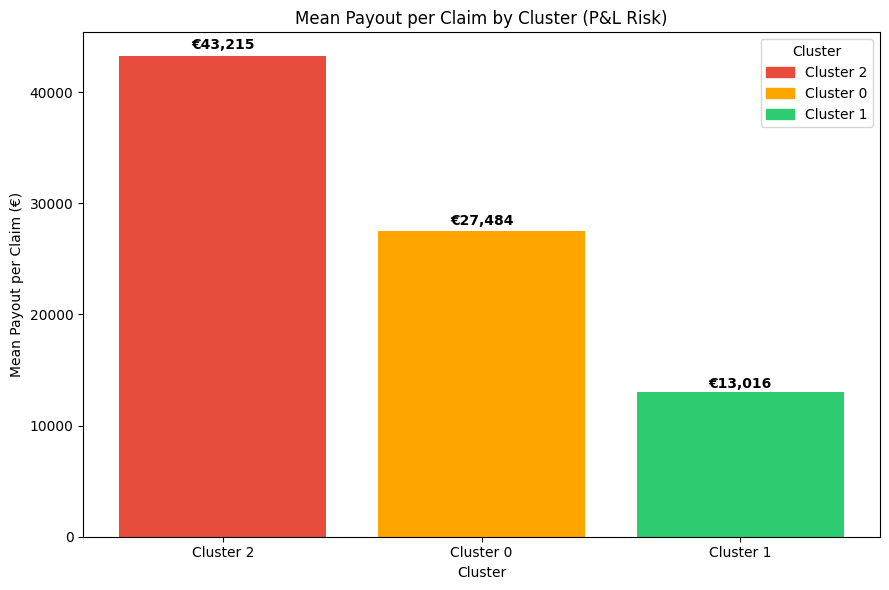

In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Cluster summary (calculated dynamically)
summary = (
    df.groupby('Cluster_KMeans')
      .agg(
          Mean_Duration=('Duration', 'mean'),
          Mean_Annuity=('Annuity', 'mean')
      )
      .reset_index()
)
summary['Mean_Payout_per_Claim'] = summary['Mean_Duration'] * summary['Mean_Annuity']

# Sort clusters by Mean_Payout_per_Claim, descending (optional, for "Risky" ordering)
summary = summary.sort_values(by='Mean_Payout_per_Claim', ascending=False).reset_index(drop=True)

# Create labels for clusters (e.g., Risky, Less Risky, Not Risky) if desired
# Otherwise, just use cluster numbers as x-labels
cluster_labels = [f'Cluster {int(c)}' for c in summary['Cluster_KMeans']]

# Set colors (one for each cluster)
# You can expand or shrink this list depending on number of clusters
colors = ['#E74C3C', '#FFA500', '#2ECC71']  # Red, orange, green (reorder as you like)

plt.figure(figsize=(9,6))
bars = plt.bar(cluster_labels, summary['Mean_Payout_per_Claim'], color=colors[:len(summary)])

plt.title('Mean Payout per Claim by Cluster (P&L Risk)')
plt.ylabel('Mean Payout per Claim (€)')
plt.xlabel('Cluster')

# Annotate
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01*yval, f"€{yval:,.0f}", ha='center', va='bottom', fontweight='bold')

# Add custom legend for clusters, showing cluster number and associated color
legend_patches = [
    mpatches.Patch(color=colors[i], label=f'Cluster {int(summary.iloc[i]["Cluster_KMeans"])}')
    for i in range(len(summary))
]
plt.legend(handles=legend_patches, title="Cluster", loc='upper right')

plt.tight_layout()
plt.savefig('Cluster_Mean_Payout_per_Claim_Dynamic.png')
plt.show()
